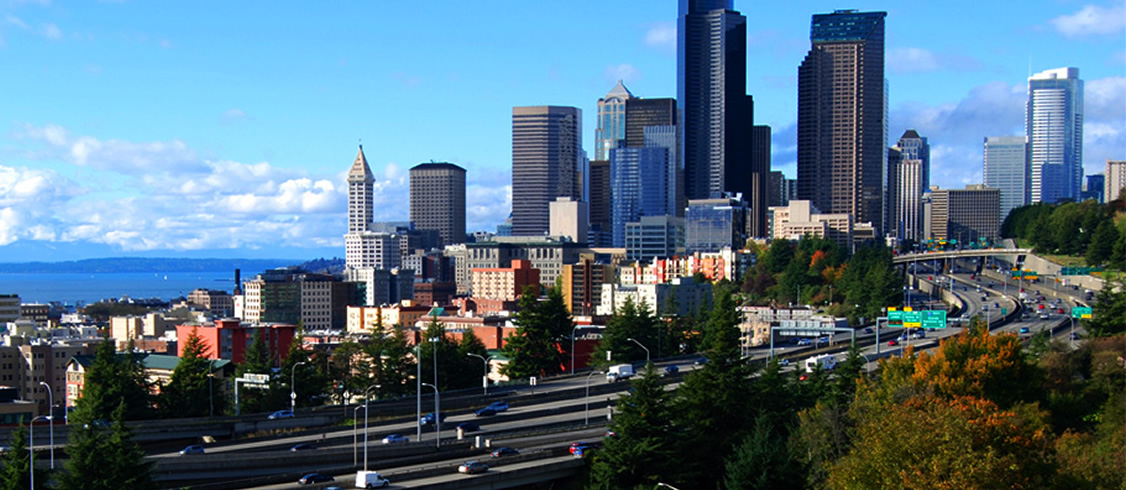

# Predicting Car Accident Severity in Seattle 


 <a id="1.Introduction"></a> 
# 1. Introduction 

## 1.1 Background 
According to the report published by US Department of Transportation, [NSHTA](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812013), there were 33,000 fatalities, 3.9 million injuries, 24 million vehicles damaged and 242 billion economic loss due to road accidents in US in 2010 alone. This economic loss includes productivity loss, medical costs for injuries, legal and court costs due to law suits, emergency service costs (EMS) for emergencies, insurance administration costs for the claims, congestion costs (including traffic delay, fuel wastage, greenhouse gas emissions etc.,), property damage, and workplace losses. There is a tremendous non-economic impact such as pain, emotional distress, PTSD and life valuations on societal harm amounts to 836 billion just for 2010. Hence, analyzing existing accident reports for patterns can help identify high accident zones, accident safety laws and predict possible accidents before it occurs. For our study we will be analyzing traffic accident reports of Seattle, Washington, US. Seattle is a very busy downtown and home of very big Tech companies like Microsoft, Facebook etc., Seattle downtown streets are very busy and prone to high accidents. 

## 1.2 Problem 
From the traffic accident report, information such as accident location, collision type, weather condition, road condition, light condition , severity type etc., are recorded and public can utilize this data to predict if a collision or injury will occur in Seattle given the suitable conditions. Hence, this data science project’s goal is to predict if an accident will occur and what will be its severity when suitable conditions occur. 

## 1.3 Interest 
Such Machine Learning models will be useful for many companies. 
1.	These models can be used by city planning officials to plan road markers, traffic light lengths, traffic patterns and routing etc.,
2.	Digital map providing companies and traffic advising companies like Google Maps, Waze etc., can utilize the prediction to warn their customers of perfect storm conditions of an accident when they are driving in those areas. 
3.	Vehicle Insurance companies can use these models to evaluate claims for vehicle accidents. 


 <a id="2. Data Section"></a> 
# 2. Data Section 

## 2.1 Data Sources 
Data provided with this [project request](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) is used for this analysis. A more raw data from [Seattle GeoData](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?selectedAttribute=SEVERITYCODE) where most of the data and attributes was also studied. Even though raw dataset has records from 2004 and has data for all severitycodes and studied for possible utilization for this project, course provided dataset with 2 severity codes was utilized due to very unbalanced nature and multiclass classification of the data. Models were evaluated for utilizing unbalanced data but could not use it because of heavily unbalanced data in the raw data. Hence, course provided dataset is utilized for this project. 

In [2]:
import pandas as pd
import numpy as np




### 2.1.1 Import Data


In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_aa3b481c122943259b83a326ecbc79b1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DX8zuR7nOo4nCfHTW2V1dxp3cG1dHGLdNh3Ou0p8HQ07',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_aa3b481c122943259b83a326ecbc79b1.get_object(Bucket='courseradatasciencecapstone-donotdelete-pr-xhynd36upptl2m',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df_data_1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:

df=df_data_1[['X','Y','SEVERITYCODE','SEVERITYDESC','VEHCOUNT','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','INCDTTM','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','ST_COLCODE','ST_COLDESC','UNDERINFL','LIGHTCOND','SPEEDING']]
df.describe()

,X,Y,SEVERITYCODE,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE
count,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,-122.330518,47.619543,1.298901,1.920780,2.444427,0.037139,0.028391,13.867768
std,0.029976,0.056157,0.457778,0.631047,1.345929,0.198150,0.167413,6.868755
min,-122.419091,47.495573,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.348673,47.575956,1.000000,2.000000,2.000000,0.000000,0.000000,11.000000
50%,-122.330224,47.615369,1.000000,2.000000,2.000000,0.000000,0.000000,13.000000
75%,-122.311937,47.663664,2.000000,2.000000,3.000000,0.000000,0.000000,14.000000
max,-122.238949,47.734142,2.000000,12.000000,81.000000,6.000000,2.000000,69.000000


The imported data has 194673 observations of various attributes such as severity code, severity code description, Address type, Junction type, collision type, Road Condition, Light Condition, Weather Condition, Speeding, Driving Under Influence indicator,  Longitude, Latitude, Injury count, Fatality count, SDOT code, description, Data and Time of Accident etc., The attribute types and description can be found at [Seattle DOT](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)

## 2.2 Data Cleansing 
Data downloaded from data source with nulls and Nan values were replaced with Unknown/Other values. Data formats were converted to other formats as required. A few columns such as Severity Code, Description & SDOT Code, Description & ST Code and Description were combined to new columns for analysis purposes. X and Y co-ordinates missing Latitude and Longitude were substituted with Seattle's Latitude and Longitude. Upon cleaning, it can be observed that the observations are available from April 1st 2004 to May 20th 2020. 

In [8]:
#Data Cleansing
latitude = 47.6062
longitude = -122.3321
df['SEVERITYCODE'].fillna('0')
df['JUNCTIONTYPE'].fillna('Unknown')
df = df.replace(r'^\s+$', np.nan, regex=True)
df = df.apply(lambda x: np.nan if isinstance(x, str) and (x.isspace() or not x) else x)
df['X'].fillna(longitude, inplace = True)
df['Y'].fillna(latitude, inplace = True)
df['PERSONCOUNT'].fillna(0, inplace = True)
df['VEHCOUNT'].fillna(0, inplace = True)
df['PEDCOUNT'].fillna(0, inplace = True)
df['PEDCYLCOUNT'].fillna(0, inplace = True)
df['JUNCTIONTYPE'].fillna('Unknown', inplace = True)
df['COLLISIONTYPE'].fillna('Other', inplace = True)
df['WEATHER'].fillna('Unknown', inplace = True)
df['ROADCOND'].fillna('Unknown', inplace = True)
df['LIGHTCOND'].fillna('Unknown', inplace = True)
df['SDOT_COLCODE'].fillna('0', inplace = True)
#df.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts()
df.astype({"SEVERITYCODE":'str', "ST_COLCODE":'str', "SDOT_COLCODE":'str', "ST_COLDESC":'str', "SDOT_COLDESC":'str'})

df['SEVERITY']= df['SEVERITYCODE'].astype(str) + " - " + df[ 'SEVERITYDESC']
df['ST']= df['ST_COLCODE'].astype(str) + " - "  + df[ 'ST_COLDESC']
df['SDOT']= df['SDOT_COLCODE'].astype(str) + " - " + df[ 'SDOT_COLDESC']
df['SEVERITY'].fillna('0 - Unknown', inplace = True)
df['SDOT'].fillna('0', inplace = True)



df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDTTM'].describe()
df['bin_hours'] = df['INCDTTM'].dt.hour



# 3. Methodology Section #

## 3.1 Exploratory Data Analysis ##

In [6]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [7]:
df_data_1['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [8]:
df_data_1['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [9]:
df_data_1['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [10]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [11]:
df['SEVERITY'].value_counts()

1 - Property Damage Only Collision    136485
2 - Injury Collision                   58188
Name: SEVERITY, dtype: int64

In [12]:
df['SDOT'].value_counts()

11 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
14 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
16 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
0 - NOT ENOUGH INFORMATION / NOT APPLICABLE                           9787
28 - MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
24 - MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
13 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
26 - MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
18 - MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
15 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
12 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
51 - PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
29 - MOTOR VEHICLE OVERTURNED IN ROAD                                  479
21 - MOTOR VEHICLE STRUCK

In [13]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
Unknown                                               6338
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Name: JUNCTIONTYPE, dtype: int64

In [14]:
df['ST'].value_counts()

32 - One parked--one moving                                                                   44421
10 - Entering at angle                                                                        34674
14 - From same direction - both going straight - one stopped - rear-end                       25771
50 - Fixed object                                                                             13554
11 - From same direction - both going straight - both moving - sideswipe                      12777
28 - From opposite direction - one left turn - one straight                                   10324
13 - From same direction - both going straight - both moving - rear-end                        7629
45 - Vehicle - Pedalcyclist                                                                    4701
23 - From same direction - all others                                                          4537
15 - From same direction - one left turn - one straight                                        3093


In [15]:
#Exploratory Data Analysis, installing seaborn
!conda install -c anaconda seaborn -y
!conda install -c anaconda pydotplus  -y
import seaborn as sns 
import matplotlib.pyplot as plt

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



# Visualization of Data Comparison between features and Severity of Accidents

In [16]:
#SEVERITY vs ADDRTYPE
df_compare_addrtype = df.groupby(['SEVERITY','ADDRTYPE']).size().reset_index(name='count')

#df_compare_addrtype.columns = ['SEVERITY','ADDRTYPE','COUNT']
#new_row = {'SEVERITY':'3 - Fatality Collision', 'ADDRTYPE':'Alley', 'count':1}
#df_compare_addrtype.append(new_row,ignore_index=True)
df_compare_addrtype.tail(20)

,SEVERITY,ADDRTYPE,count
0,1 - Property Damage Only Collision,Alley,669
1,1 - Property Damage Only Collision,Block,96830
2,1 - Property Damage Only Collision,Intersection,37251
3,2 - Injury Collision,Alley,82
4,2 - Injury Collision,Block,30096
5,2 - Injury Collision,Intersection,27819


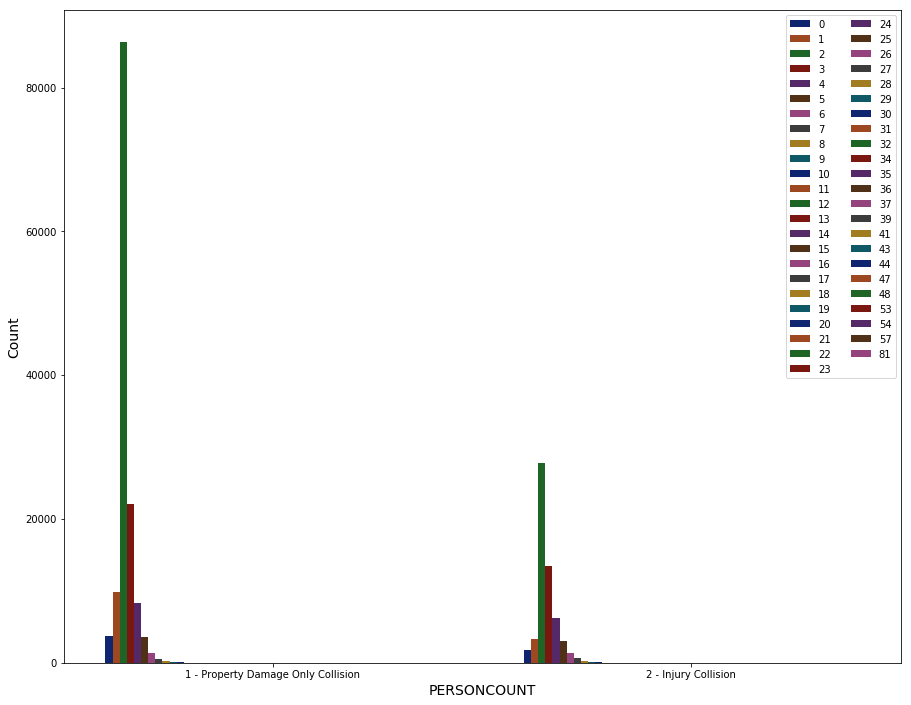

In [17]:
df_compare_PERSONCOUNT = df.groupby(['SEVERITY','PERSONCOUNT']).size().reset_index(name='count')


f, ax = plt.subplots(figsize=(15, 12))

percountgraph = sns.barplot(x="SEVERITY", y="count", hue="PERSONCOUNT",  data=df_compare_PERSONCOUNT, palette="dark")

ax.legend(ncol = 2, loc = 'upper right')

plt.ylabel("Count", size=14)
plt.xlabel("PERSONCOUNT", size=14)
#plt.title("Histogram: PERSONCOUNT", size=18)


plt.savefig("grouped_barplot_Seaborn_barplot_Python_PERSONCOUNT1.png")

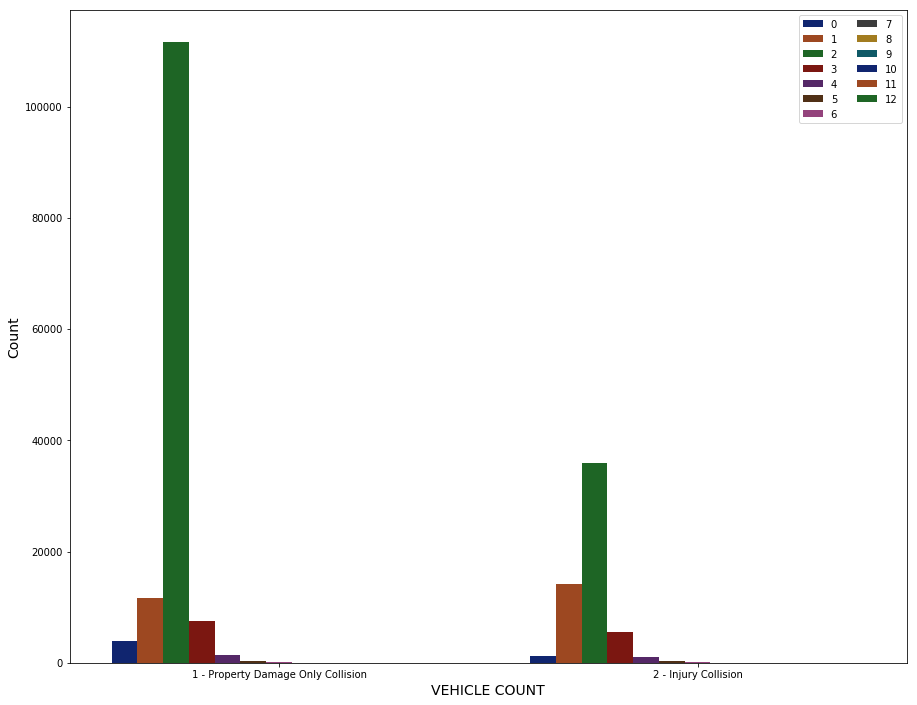

In [18]:
df_compare_VEHCOUNT = df.groupby(['SEVERITY','VEHCOUNT']).size().reset_index(name='count')


f, ax = plt.subplots(figsize=(15, 12))

vehcountgraph = sns.barplot(x="SEVERITY", y="count", hue="VEHCOUNT",  data=df_compare_VEHCOUNT, palette="dark")

ax.legend(ncol = 2, loc = 'upper right')

plt.ylabel("Count", size=14)
plt.xlabel("VEHICLE COUNT", size=14)
#plt.title("Histogram: PERSONCOUNT", size=18)


plt.savefig("grouped_barplot_Seaborn_barplot_Python_VEHCOUNT.png")

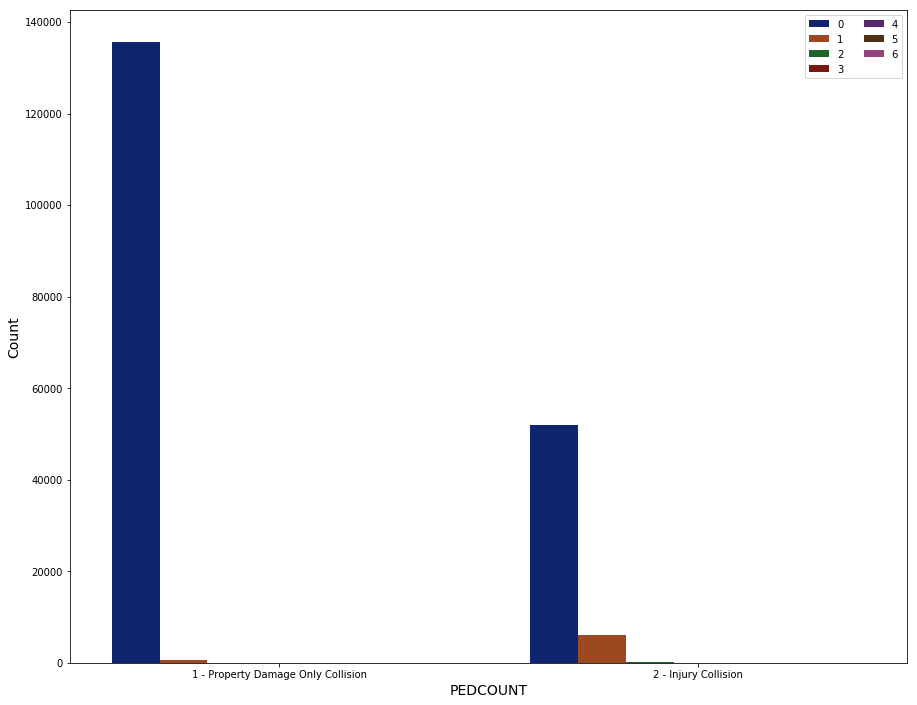

In [19]:
df_compare_PEDCOUNT = df.groupby(['SEVERITY','PEDCOUNT']).size().reset_index(name='count')


f, ax = plt.subplots(figsize=(15, 12))

pedcountgraph = sns.barplot(x="SEVERITY", y="count", hue="PEDCOUNT",  data=df_compare_PEDCOUNT, palette="dark")

ax.legend(ncol = 2, loc = 'upper right')

plt.ylabel("Count", size=14)
plt.xlabel("PEDCOUNT", size=14)
#plt.title("Histogram: PERSONCOUNT", size=18)


plt.savefig("grouped_barplot_Seaborn_barplot_Python_PEDCOUNT1.png")

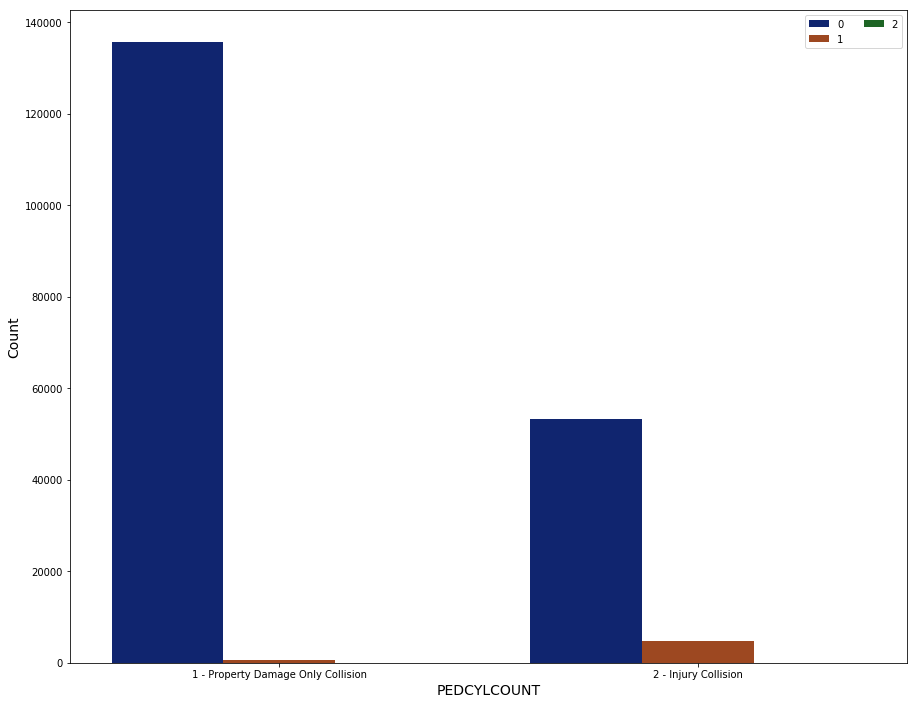

In [20]:
df_compare_PEDCOUNT = df.groupby(['SEVERITY','PEDCYLCOUNT']).size().reset_index(name='count')


f, ax = plt.subplots(figsize=(15, 12))

pedcountgraph = sns.barplot(x="SEVERITY", y="count", hue="PEDCYLCOUNT",  data=df_compare_PEDCOUNT, palette="dark")

ax.legend(ncol = 2, loc = 'upper right')

plt.ylabel("Count", size=14)
plt.xlabel("PEDCYLCOUNT", size=14)
#plt.title("Histogram: PERSONCOUNT", size=18)


plt.savefig("grouped_barplot_Seaborn_barplot_Python_PEDCYLCOUNT.png")

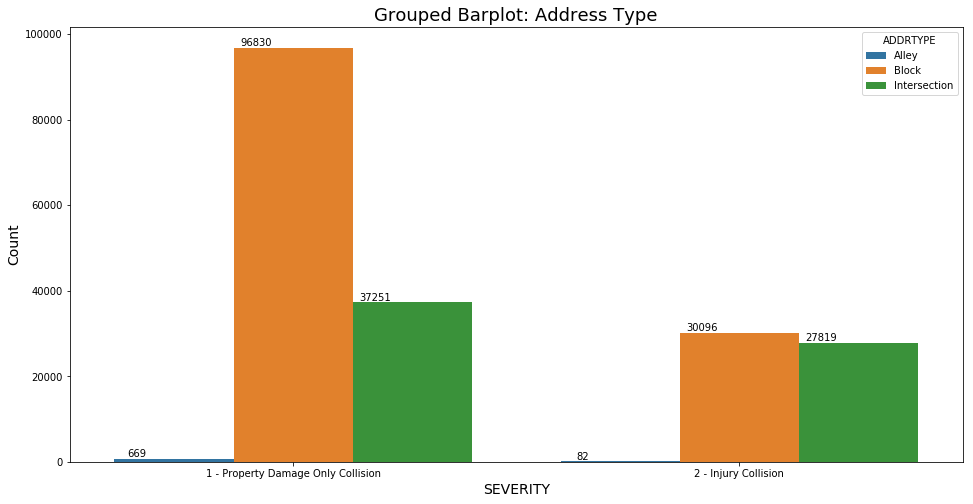

In [21]:
#df_compare_addrtype.plot(kind='bar', figsize=(10, 6),color=['coral', 'darkslateblue', 'mediumseagreen'])
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
graph=sns.barplot(x="SEVERITY", y="count", hue="ADDRTYPE", data=df_compare_addrtype)
plt.ylabel("Count", size=14)
plt.xlabel("SEVERITY", size=14)
plt.title("Grouped Barplot: Address Type", size=18)
for p in graph.patches:
       graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()),
                  ha='center', va='bottom',
                 color= 'black')
plt.savefig("grouped_barplot_Seaborn_barplot_Python_addrtype.png")

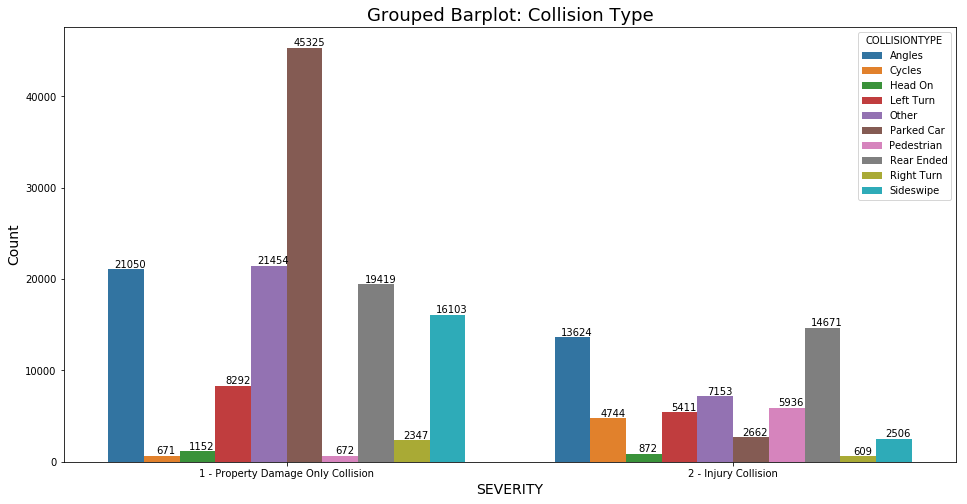

In [22]:
df_compare_COLLISIONTYPE = df.groupby(['SEVERITY','COLLISIONTYPE']).size().reset_index(name='count')
plt.figure(figsize=(16, 8))
collisiongraph = sns.barplot(x="SEVERITY", y="count", hue="COLLISIONTYPE", data=df_compare_COLLISIONTYPE)
plt.ylabel("Count", size=14)
plt.xlabel("SEVERITY", size=14)
plt.title("Grouped Barplot: Collision Type", size=18)
for p in collisiongraph.patches:
       collisiongraph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()),
                  ha='center', va='bottom',
                 color= 'black')

plt.savefig("grouped_barplot_Seaborn_barplot_Python_collisiontype.png")


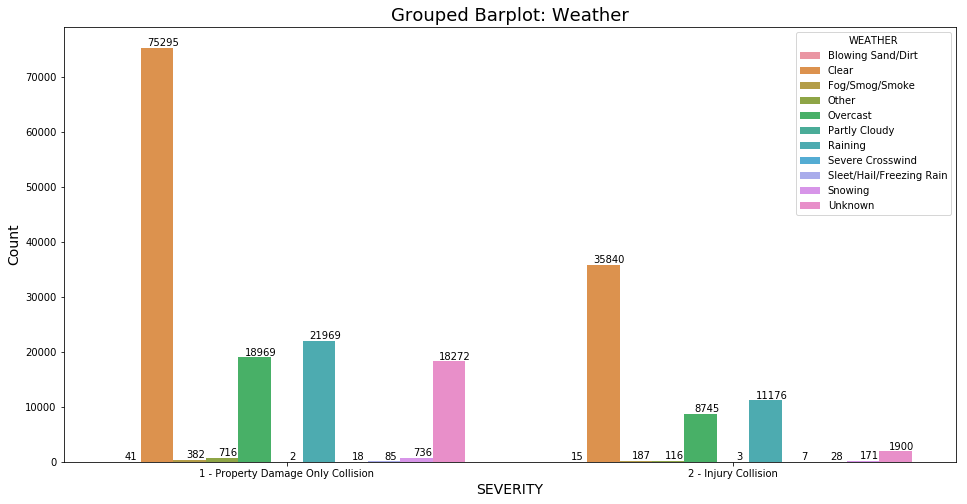

In [23]:
df_compare_WEATHER = df.groupby(['SEVERITY','WEATHER']).size().reset_index(name='count')
plt.figure(figsize=(16, 8))
weathergraph= sns.barplot(x="SEVERITY", y="count", hue="WEATHER", data=df_compare_WEATHER)
plt.ylabel("Count", size=14)
plt.xlabel("SEVERITY", size=14)
plt.title("Grouped Barplot: Weather", size=18)
for p in weathergraph.patches:
       weathergraph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()),
                  ha='center', va='bottom',
                 color= 'black')

plt.savefig("grouped_barplot_Seaborn_barplot_Python_weathergraph.png")

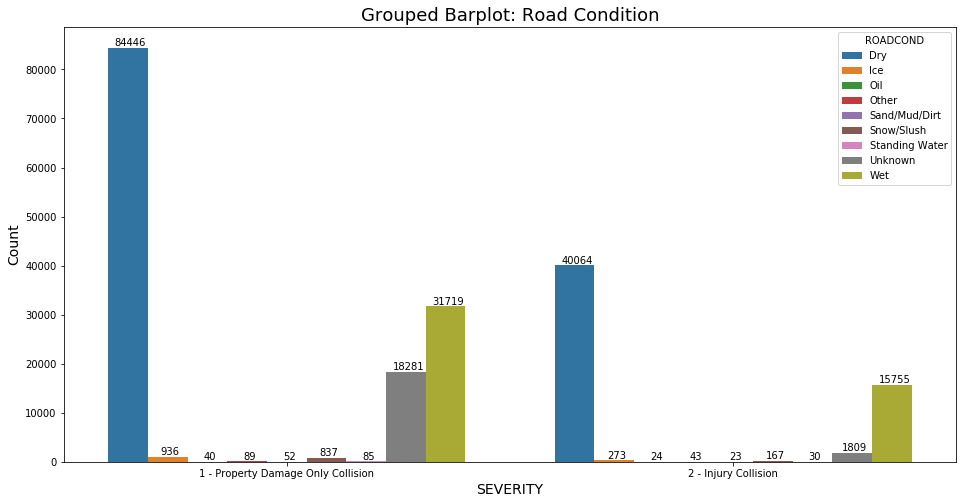

In [24]:
df_compare_ROADCOND = df.groupby(['SEVERITY','ROADCOND']).size().reset_index(name='count')
plt.figure(figsize=(16, 8))
roadcondgraph = sns.barplot(x="SEVERITY", y="count", hue="ROADCOND", data=df_compare_ROADCOND)
plt.ylabel("Count", size=14)
plt.xlabel("SEVERITY", size=14)
plt.title("Grouped Barplot: Road Condition", size=18)
for p in roadcondgraph.patches:
       roadcondgraph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()),
                   ha='center', va='bottom',
                  color= 'black')
plt.savefig("grouped_barplot_Seaborn_barplot_Python_roadcondgraph.png")

In [25]:
df_compare_ST = df.groupby(['SEVERITY','ST']).size().reset_index(name='count')
df_compare_ST.sort_values('count', ascending = False)

df_compare_ST

,SEVERITY,ST,count
0,1 - Property Damage Only Collision,0 - Vehicle going straight hits pedestrian,315
1,1 - Property Damage Only Collision,1 - Vehicle turning right hits pedestrian,142
2,1 - Property Damage Only Collision,10 - Entering at angle,21050
3,1 - Property Damage Only Collision,11 - From same direction - both going straight...,11016
4,1 - Property Damage Only Collision,12 - From same direction - both going straight...,2188
5,1 - Property Damage Only Collision,13 - From same direction - both going straight...,4575
6,1 - Property Damage Only Collision,14 - From same direction - both going straight...,14403
7,1 - Property Damage Only Collision,15 - From same direction - one left turn - one...,2362
8,1 - Property Damage Only Collision,16 - From same direction - one right turn - on...,2347
9,1 - Property Damage Only Collision,17 - Strikes or Was Struck by Object from the ...,7


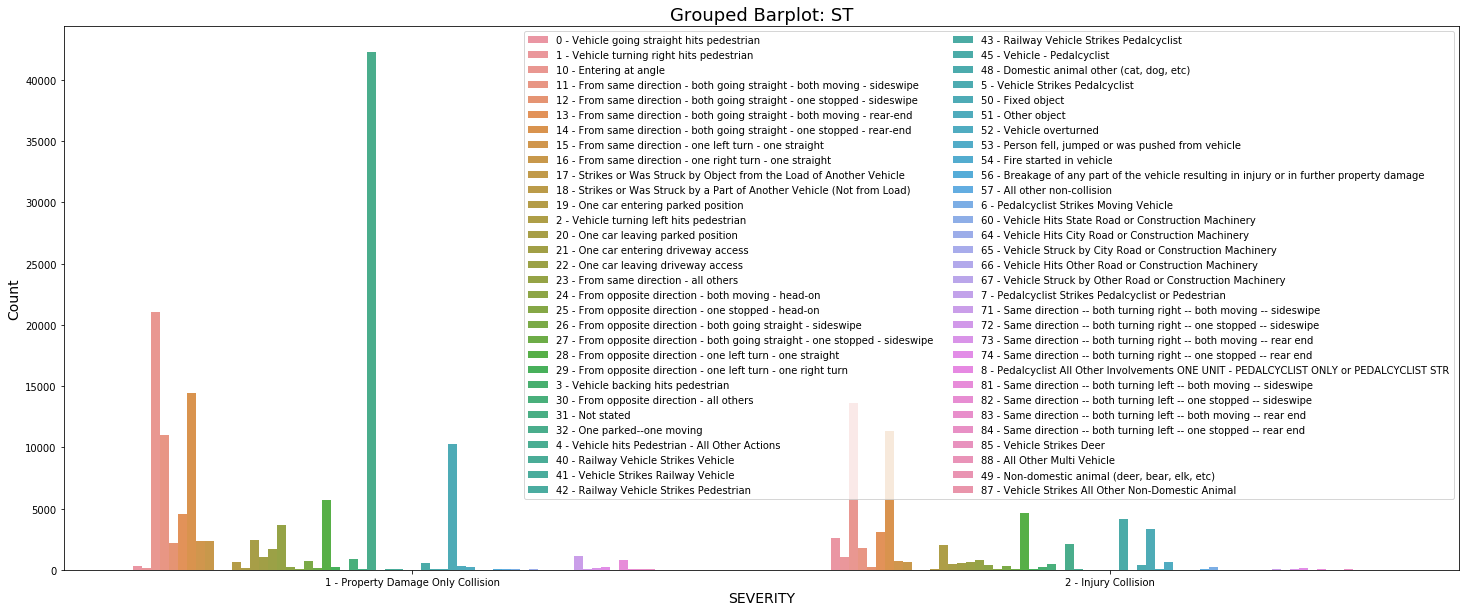

In [26]:


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))

st=sns.barplot(x="SEVERITY", y="count", hue="ST", data=df_compare_ST
              )
ax.legend(ncol = 2, loc = 'upper right')
plt.ylabel("Count", size=14)
plt.xlabel("SEVERITY", size=14)
plt.title("Grouped Barplot: ST", size=18)
#for p in st.patches:
#        st.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()),
#                  ha='center', va='bottom',
#                   color= 'black')
plt.savefig("grouped_barplot_Seaborn_barplot_Python_st.png")

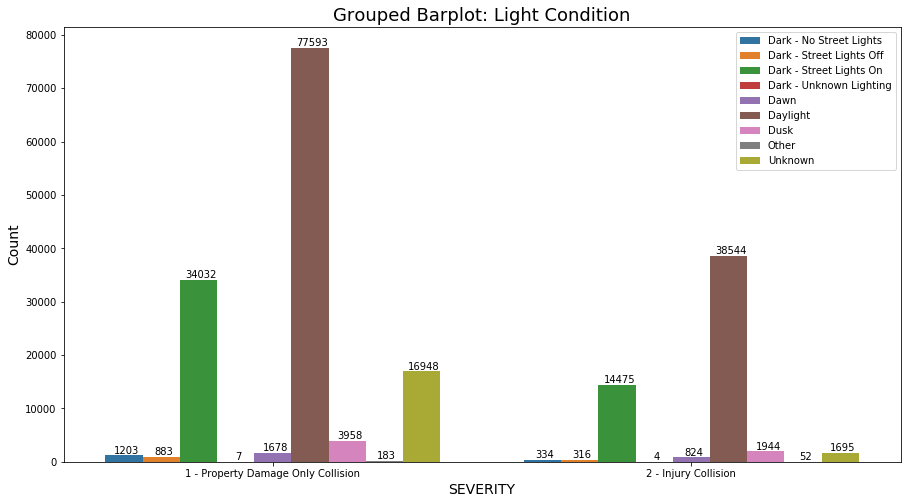

In [27]:

df_compare_LIGHTCOND = df.groupby(['SEVERITY','LIGHTCOND']).size().reset_index(name='count')
df_compare_LIGHTCOND.sort_values('count', ascending = False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

lightcond=sns.barplot(x="SEVERITY", y="count", hue="LIGHTCOND", data=df_compare_LIGHTCOND
              )
ax.legend(ncol = 1, loc = 'upper right')
plt.ylabel("Count", size=14)
plt.xlabel("SEVERITY", size=14)
plt.title("Grouped Barplot: Light Condition", size=18)
for p in lightcond.patches:
        lightcond.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()),
                   ha='center', va='bottom',
                  color= 'black')
plt.savefig("grouped_barplot_Seaborn_barplot_Python_lightcond.png")

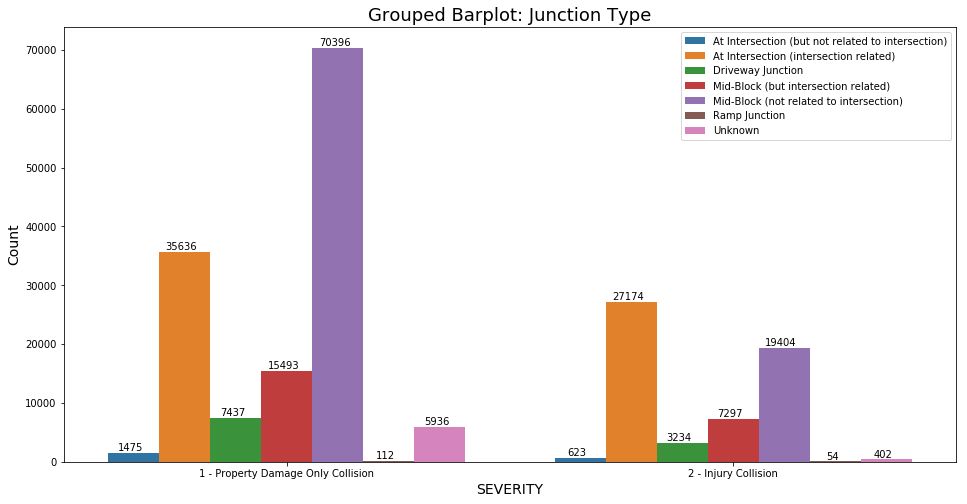

In [28]:
df_compare_JUNCTIONTYPE = df.groupby(['SEVERITY','JUNCTIONTYPE']).size().reset_index(name='count')

f, ax = plt.subplots(figsize=(16, 8))
junctiontype = sns.barplot(x="SEVERITY", y="count", hue="JUNCTIONTYPE", data=df_compare_JUNCTIONTYPE)
ax.legend(ncol = 1, loc = 'upper right')
plt.ylabel("Count", size=14)
plt.xlabel("SEVERITY", size=14)
plt.title("Grouped Barplot: Junction Type", size=18)
for p in junctiontype.patches:
        junctiontype.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()),
                  ha='center', va='bottom',
                   color= 'black')
plt.savefig("grouped_barplot_Seaborn_barplot_Python_juctiontype.png")

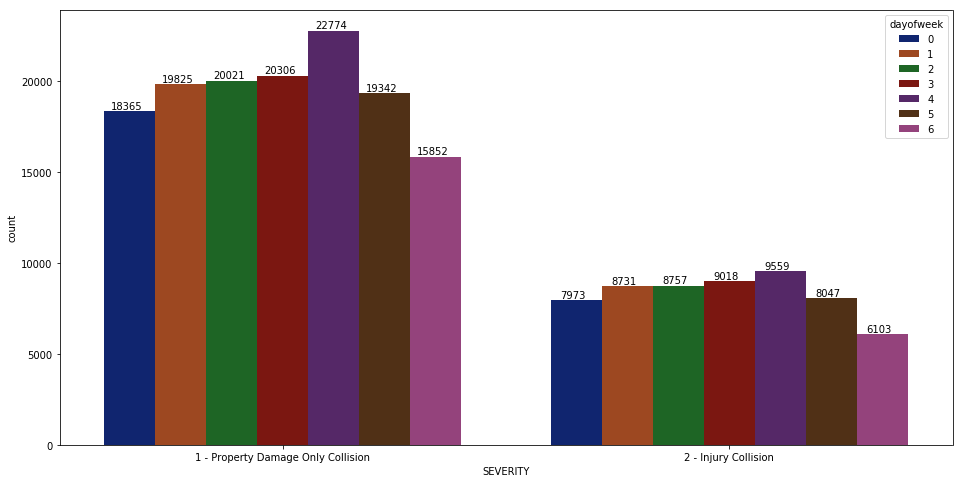

In [29]:
df['dayofweek'] = df['INCDTTM'].dt.dayofweek

bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
df_compare_dayofweek = df.groupby(['SEVERITY','dayofweek']).size().reset_index(name='count')

f, ax = plt.subplots(figsize=(16, 8))
g = sns.barplot(
    data=df_compare_dayofweek, 
    x="SEVERITY",  y="count", hue="dayofweek",
     palette="dark"
)
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()),
                  ha='center', va='bottom',
                   color= 'black')


plt.show()

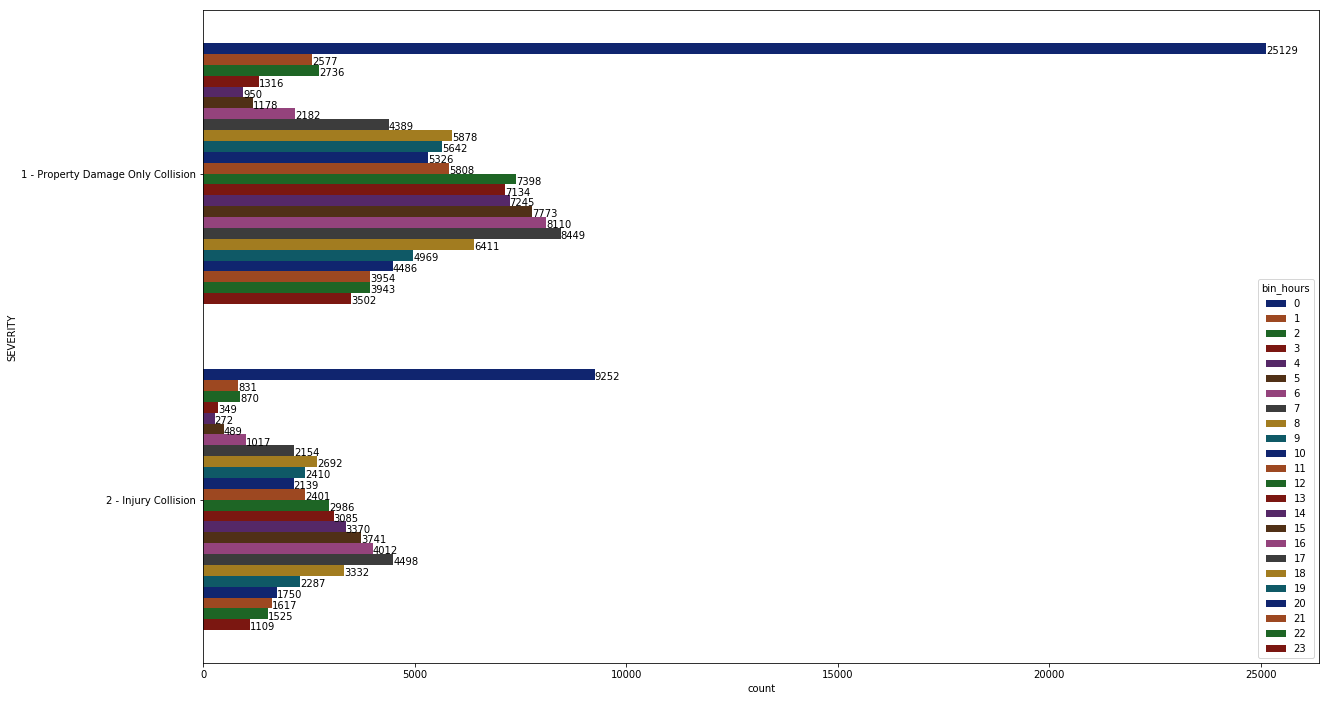

In [30]:

df['bin_hours'] = df['INCDTTM'].dt.hour
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
df_compare_hours = df.groupby(['SEVERITY','bin_hours']).size().reset_index(name='count')

f, ax = plt.subplots(figsize=(20, 12))
hourly = sns.barplot(
    data=df_compare_hours, 
    x="count",  y="SEVERITY", hue="bin_hours",
     palette="dark"
)
for p in hourly.patches:
        format1 = '{:.0f}'.format( p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        hourly.annotate(format1, (x, y),
                   color= 'black')


plt.show()

In [31]:
df_compare_SDOT = df.groupby(['SEVERITY','SDOT']).size().reset_index(name='count')
df_compare_SDOT.sort_values('count', ascending = False)
df_compare_SDOT.head(20)

,SEVERITY,SDOT,count
0,1 - Property Damage Only Collision,0 - NOT ENOUGH INFORMATION / NOT APPLICABLE,9079
1,1 - Property Damage Only Collision,"11 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT...",60871
2,1 - Property Damage Only Collision,"12 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT...",1413
3,1 - Property Damage Only Collision,"13 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT ...",5653
4,1 - Property Damage Only Collision,"14 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",36551
5,1 - Property Damage Only Collision,"15 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT...",1529
6,1 - Property Damage Only Collision,"16 - MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT ...",9236
7,1 - Property Damage Only Collision,"18 - MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT ...",370
8,1 - Property Damage Only Collision,"21 - MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END",41
9,1 - Property Damage Only Collision,"22 - MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT ...",1


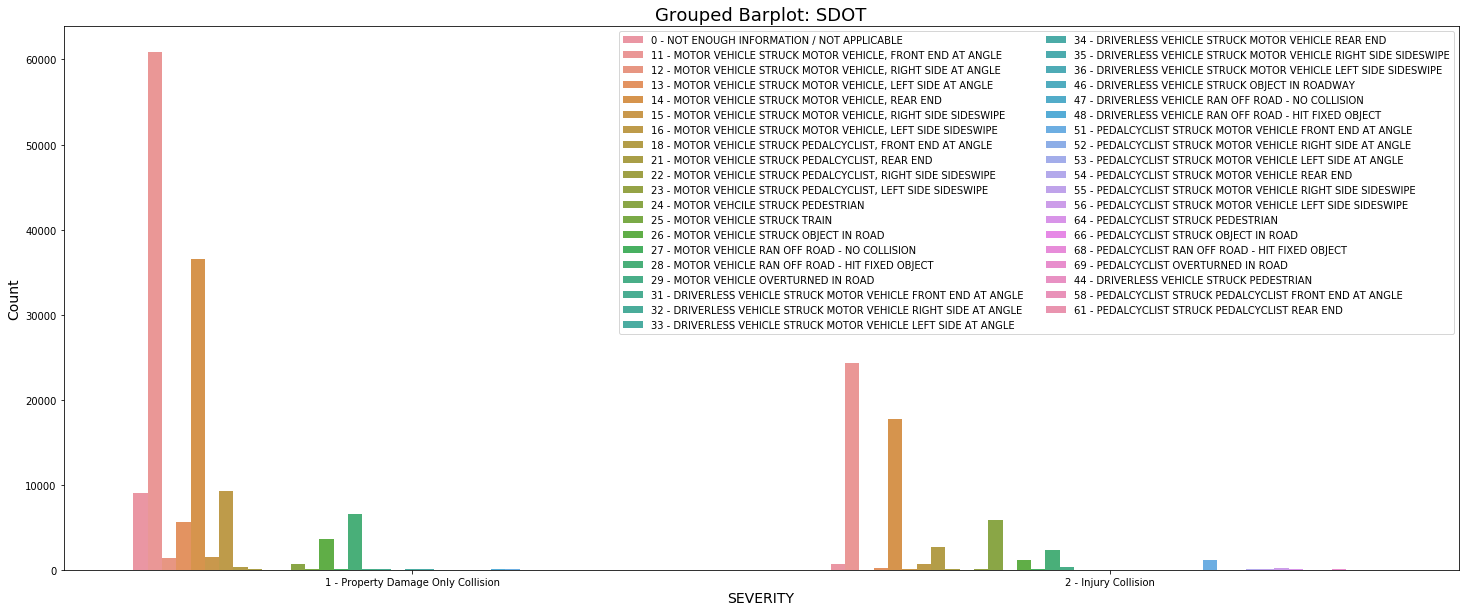

In [32]:




# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))

sdot=sns.barplot(x="SEVERITY", y="count", hue="SDOT", data=df_compare_SDOT )
ax.legend(ncol = 2, loc = 'upper right')
plt.ylabel("Count", size=14)
plt.xlabel("SEVERITY", size=14)
plt.title("Grouped Barplot: SDOT", size=18)
#for p in sdot.patches:
#       sdot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()),
#                  ha='center', va='bottom',
#                   color= 'black')
plt.savefig("grouped_barplot_Seaborn_barplot_Python_sdot.png")

In [33]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be UPDATED:

    certifi:         2020.6.20-py36_0  anaconda --> 2020.6.20-py36h9f0ad1d_0 conda-forge
    openssl:         1.1.1h-h7b6447c_0 anaconda --> 1.1.1h-h516909a_0        conda-forge

The following packages will be DOWNGRADED:

    ca-certificates: 2020.7.22-0       anaconda --> 2020.6.20-hecda079_0     conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium installed and imported!


In [34]:
# Seatle latitude and longitude values
latitude = 47.6062
longitude = -122.3321
# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=10)
#df_subset  = df_data_1[df_data_1.SEVERITYCODE==1 ].head(100) 
#df_subset.append(df_data_1[df_data_1.SEVERITYCODE==2 ].head(100) )

df_subset=df_data_1.head(200)

# display the map of Seattle
#seattle_map
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, severity in zip(df_subset.Y, df_subset.X, df_subset.SEVERITYCODE): 
      if ((not np.isnan(lat)) and (not np.isnan(lng)) and (not pd.isna(severity))):
        if severity == 1 :
             incidents.add_child(
          folium.features.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
           )
          )
        else :
            incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='red',
            fill=False,
            fill_color='blue',
            fill_opacity=0.6
        )
     )  
#        add incidents to map
seattle_map.add_child(incidents)
seattle_map

In [35]:
from folium import plugins
df_location = df_data_1[['SEVERITYCODE','SEVERITYDESC','X','Y']]
df_location = df_location.dropna(axis=0)
df_subset  = df_location[df_data_1.SEVERITYCODE==1 ].head(1000) 
df_subset.append(df_location[df_data_1.SEVERITYCODE==2 ].head(1000) )



seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, severity in zip(df_subset.Y, df_subset.X, df_subset.SEVERITYDESC): 
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=severity,
    ).add_to(incidents)

# display map
seattle_map

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


# Feature Engineering

In [9]:
#Data Fill Convert to String to Numeric Values




features =['SEVERITY','X','Y','JUNCTIONTYPE','PEDCOUNT','VEHCOUNT','PERSONCOUNT','PEDCYLCOUNT','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SDOT_COLCODE','SDOT','SEVERITYCODE','bin_hours']
dff=df[features]

missing_data = dff.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  
#Convert String values to numeric values




#dff["X"] = np.radians(dff["X"])
#dff["Y"] = np.radians(dff["Y"])





SEVERITY
False    194673
Name: SEVERITY, dtype: int64

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

COLLISIONTYPE
False    194673
Name: COLLISIONTYPE, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

SDOT
False    194673
Name: SDOT, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

bin_hours
False    194673
Name: bin_hours, dtype: int64



# DownSample - unbalanced count

In [11]:
from sklearn.utils import resample
from sklearn import preprocessing
features_n =['JUNCTIONTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','bin_hours']
features_n2 =['SEVERITYCODE','JUNCTIONTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','bin_hours']

dff_n = pd.get_dummies(dff[features_n2], prefix_sep='_', drop_first=True)
#Normalize data

# Separate majority and minority classes
df_majority = dff_n[dff_n['SEVERITYCODE']==1]
df_minority = dff_n[dff_n['SEVERITYCODE']==2]
df_maj_eval= df_majority.iloc[135484:,:]
df_min_eval=df_minority.iloc[57187:,:]

df_majority = df_majority.iloc[:135480,:]
df_minority = df_minority.iloc[:57180,:]
df_eval = pd.concat([df_maj_eval, df_min_eval])

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=50000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['SEVERITYCODE'].value_counts()
#


X = df_downsampled
X= X.drop(['SEVERITYCODE'], axis=1)
X= preprocessing.StandardScaler().fit(X).transform(X)
y = df_downsampled['SEVERITYCODE'].values

X_eval = df_eval
X_eval = X_eval.drop(['SEVERITYCODE'], axis=1)
X_eval = preprocessing.StandardScaler().fit(X_eval).transform(X_eval)
y_eval = df_eval['SEVERITYCODE'].values

print ('Main set:', X.shape,  y.shape)
print ('Eval set:', X_eval.shape,  y_eval.shape)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:35: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


Main set: (107180, 42) (107180,)
Eval set: (2002, 42) (2002,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:40: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


# Split Test and Train

In [12]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (85744, 42) (85744,)
Test set: (21436, 42) (21436,)


In [13]:
#Test Train Split Knn


KNN_downsampled = pd.concat([df_majority_downsampled.head(5000), df_minority.head(5000)])
X_Knn= KNN_downsampled
X_Knn = X_Knn.drop(['SEVERITYCODE'], axis=1)
X_Knn = preprocessing.StandardScaler().fit(X_Knn).transform(X_Knn)

y_Knn = KNN_downsampled['SEVERITYCODE'].values
KNN_downsampled.describe()

XKnn_train, XKnn_test, yKnn_train, yKnn_test = train_test_split( X_Knn, y_Knn, test_size=0.2, random_state=2, stratify=y_Knn)
print ('Knn Train set:', XKnn_train.shape,  yKnn_train.shape)
print ('Knn Test set:', XKnn_test.shape,  yKnn_test.shape)

Knn Train set: (8000, 42) (8000,)
Knn Test set: (2000, 42) (2000,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


# Model Creation & Evaluation

## K Nearest Neighbors Model Evaluation

In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks =50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for k in range(1,Ks) : 
#Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(XKnn_train,yKnn_train)
    yhat = neigh.predict(XKnn_test)
    mean_acc[k-1] = metrics.accuracy_score(yKnn_test, yhat)
    std_acc[k-1]=np.std(yhat==yKnn_test)/np.sqrt(yhat.shape[0])
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


    

The best accuracy was with 0.7315 with k= 28


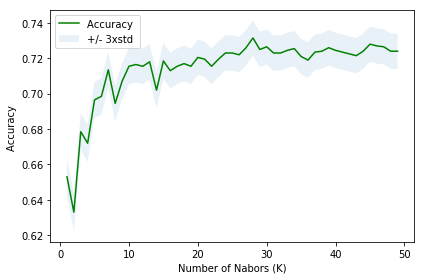

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Knn:
Accuracy: 73.15%
Jaccard: 73.15%
f1_score: 71.33%
Confusion matrix:
 [[668 332]
 [205 795]]


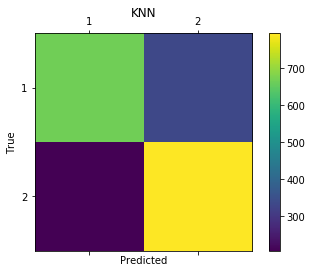

In [18]:
#COnfusion Matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(XKnn_train,yKnn_train)
yhat_Knn = neigh.predict(XKnn_test)
accuracy = metrics.accuracy_score(yKnn_test, yhat_Knn)
   
print('Knn:')
print('Accuracy: %.2f%%' % (accuracy * 100.0))
j_dt= jaccard_similarity_score(yKnn_test, yhat_Knn )
f1_dt= f1_score(yKnn_test, yhat_Knn )
print('Jaccard: %.2f%%' % (j_dt * 100.0))
print('f1_score: %.2f%%' % (f1_dt * 100.0))
#print(itemfreq(y_pred))
# Build confusion matrix
labels=[1,2]
cm = confusion_matrix(y_true=yKnn_test, y_pred=yhat_Knn )
print("Confusion matrix:\n", cm)
# Plot matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('KNN')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

0.8017782999999999
Area Under Curve: 0.27


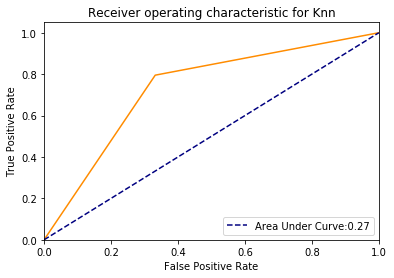

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


prob_y_4 = neigh.predict_proba(X_Knn)
#print(prob_y_4 )
#print( np.unique( SeverityPredTree ) )
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_Knn, prob_y_4) )
fpr, tpr, threshold = roc_curve(yKnn_test, yhat_Knn, pos_label=2)

plt.figure()
area = auc(tpr, fpr)
print ("Area Under Curve: %0.2f" % area)

plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--', label= "Area Under Curve:%0.2f"%area)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Knn')
plt.legend(loc="lower right")
plt.show()



Knn: Average precision-recall score: 0.43
Area Under Curve: 0.80


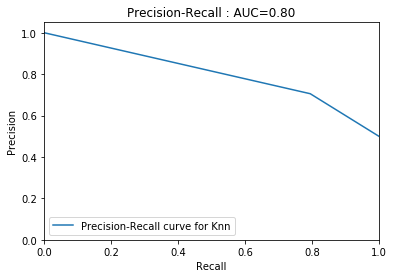

In [20]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yKnn_test, yhat_Knn)
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

print('Knn: Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, thresholds = precision_recall_curve(yKnn_test, yhat_Knn, pos_label=2)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve for Knn' )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall : AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

## Decision Tree Model Evaluation

Decision Tree:
Accuracy: 69.43%
Jaccard: 69.43%
f1_score: 69.23%
Confusion matrix:
 [[6160 3840]
 [2713 8723]]


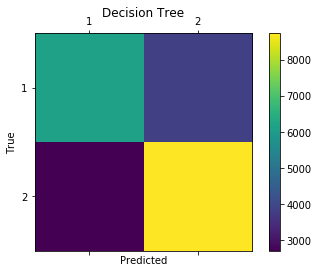

In [21]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#Decision Tree - no need for normalized data
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
#Init Decision Tree
SeverityTree = DecisionTreeClassifier(class_weight="balanced", criterion="entropy")
#SeverityTree = RandomForestClassifier()
#Fit Training Data
SeverityTree.fit(X_train,y_train)
#Predict
SeverityPredTree = SeverityTree.predict(X_test)
# Get accuracy score
accuracy = metrics.accuracy_score(y_test, SeverityPredTree)

print('Decision Tree:')
print('Accuracy: %.2f%%' % (accuracy * 100.0))
j_dt= jaccard_similarity_score(y_test, SeverityPredTree)
f1_dt= f1_score(y_test, SeverityPredTree, average='weighted')
print('Jaccard: %.2f%%' % (j_dt * 100.0))
print('f1_score: %.2f%%' % (f1_dt * 100.0))
#print(itemfreq(y_pred))
# Build confusion matrix
labels=[1,2]
cm = confusion_matrix(y_true=y_test, y_pred=SeverityPredTree)
print("Confusion matrix:\n", cm)
# Plot matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Decision Tree')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


0.8101163850996853
Area Under Curve: 0.31


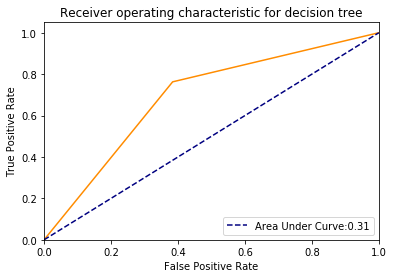

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


prob_y_4 = SeverityTree.predict_proba(X)
#print(prob_y_4 )
#print( np.unique( SeverityPredTree ) )
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )
fpr, tpr, threshold = roc_curve(y_test, SeverityPredTree, pos_label=2)

plt.figure()
area = auc(tpr, fpr)
print ("Area Under Curve: %0.2f" % area)

plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--', label= "Area Under Curve:%0.2f"%area)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for decision tree')
plt.legend(loc="lower right")
plt.show()


Decision Tree: Average precision-recall score: 0.40
Area Under Curve: 0.79


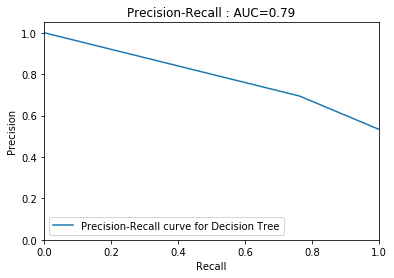

In [23]:

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, SeverityPredTree)
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

print('Decision Tree: Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, thresholds = precision_recall_curve(y_test, SeverityPredTree, pos_label=2)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve for Decision Tree' )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall : AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()



## Support Vector Machine Model Evaluation

In [24]:
#Test Train Split SVM


SVM_downsampled = pd.concat([df_majority_downsampled.head(5000), df_minority.head(5000)])
features_svm = features_n
#['JUNCTIONTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND' ]
X_SVM= SVM_downsampled
X_SVM = X_SVM.drop(['SEVERITYCODE'], axis=1)
X_SVM = preprocessing.StandardScaler().fit(X_SVM).transform(X_SVM)
y_SVM = SVM_downsampled['SEVERITYCODE'].values
SVM_downsampled.describe()


XSVM_train, XSVM_test, ySVM_train, ySVM_test = train_test_split( X_SVM, y_SVM, test_size=0.2, random_state=2, stratify=y_SVM)
print ('SVM Train set:', XSVM_train.shape,  ySVM_train.shape)
print ('SVM Test set:', XSVM_test.shape,  ySVM_test.shape)

SVM Train set: (8000, 42) (8000,)
SVM Test set: (2000, 42) (2000,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine's Accuracy:  0.738
SVM:
Jaccard: 73.80%
f1_score: 71.24%
Confusion matrix:
 [[649 351]
 [173 827]]


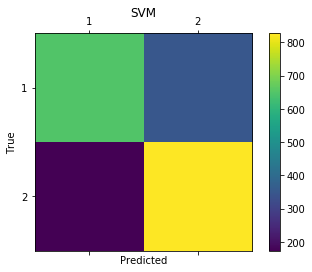

In [25]:
from sklearn import svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

clf = svm.SVC(kernel='rbf', cache_size=1000, probability=True)
clf.fit(XSVM_train, ySVM_train)
yhat_svm = clf.predict(XSVM_test)
print("Support Vector Machine's Accuracy: ", metrics.accuracy_score(ySVM_test, yhat_svm))
j_svm= jaccard_similarity_score(ySVM_test, yhat_svm)
f1_svm= f1_score(ySVM_test, yhat_svm)
print('SVM:')
print('Jaccard: %.2f%%' % (j_svm * 100.0))
print('f1_score: %.2f%%' % (f1_svm * 100.0))
#print(itemfreq(y_pred))
# Build confusion matrix
labels=[1,2]
cm = confusion_matrix(y_true=ySVM_test, y_pred=yhat_svm)
print("Confusion matrix:\n", cm)
# Plot matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('SVM')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


0.79886266
Area Under Curve: 0.26


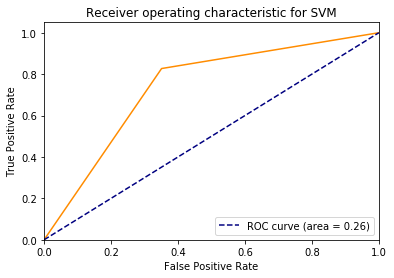

In [26]:
#ROC
svm_y_prob = clf.predict_proba(X_SVM)
prob_y_4 = [p[1] for p in svm_y_prob]
print( roc_auc_score(y_SVM, prob_y_4) )
fpr, tpr, threshold = roc_curve(ySVM_test, yhat_svm, pos_label=2)

plt.figure()
area = auc(tpr, fpr)
print ("Area Under Curve: %0.2f" % area)

plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--', label='ROC curve (area = %0.2f)' % area)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

SVM: Average precision-recall score: 0.43
Area Under Curve: 0.81


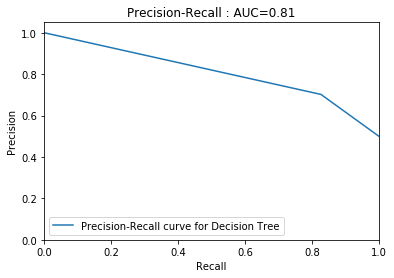

In [27]:
#Precision Recall:
average_precision = average_precision_score(ySVM_test, yhat_svm)


print('SVM: Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, thresholds = precision_recall_curve(ySVM_test, yhat_svm, pos_label=2)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve for Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall : AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

## Logistic Regression Model Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
yhat_LR = LR.predict(X_test)
yhat_LR

array([2, 1, 1, ..., 2, 2, 2])

Logistic Regression:
Logistic Regression's Accuracy:  0.709460720283635
Jaccard: 70.95%
f1_score: 70.25%
LogLoss: 55.14%
Confusion matrix:
 [[5579 4421]
 [1807 9629]]


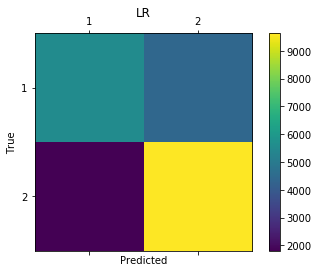

In [30]:
import pylab as plt
yhat_prob_LR = LR.predict_proba(X_test)
yhat_prob_LR
print('Logistic Regression:')
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))
j_LR= jaccard_similarity_score(y_test, yhat_LR)
f1_LR= f1_score(y_test, yhat_LR, average='weighted')
logloss = log_loss(y_test, yhat_prob_LR)
print('Jaccard: %.2f%%' % (j_LR * 100.0))
print('f1_score: %.2f%%' % (f1_LR * 100.0))
print('LogLoss: %.2f%%' % (logloss * 100.0))
# Build confusion matrix
labels = [1,2]
cm = confusion_matrix(y_true=y_test, y_pred=yhat_LR, labels=labels)
print("Confusion matrix:\n", cm)
# Plot matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('LR')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


0.77294163606156
Area Under Curve: 0.30


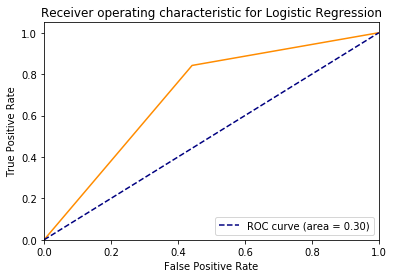

In [31]:
#ROC
LR_y_prob =LR.predict_proba(X)
prob_y_LR = [p[1] for p in LR_y_prob]


print( roc_auc_score(y, prob_y_LR) )
fpr, tpr, threshold = roc_curve(y_test, yhat_LR, pos_label=2)

plt.figure()
area = auc(tpr, fpr)
print ("Area Under Curve: %0.2f" % area)

plt.plot(fpr, tpr, color='darkorange')

plt.plot([0, 1], [0, 1], color='navy',  linestyle='--', label='ROC curve (area = %0.2f)' % area)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()



Logistic Regression: Average precision-recall score: 0.43
Area Under Curve: 0.81


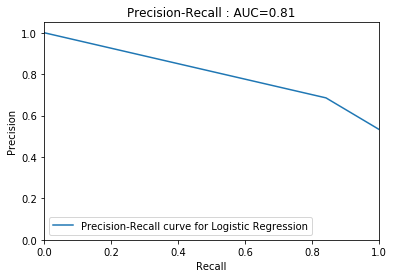

In [32]:
#Precision Recall:
print('Logistic Regression: Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, thresholds = precision_recall_curve(y_test, yhat_LR, pos_label=2)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall : AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

## Model Evaluation

Knn Evaluation:
Accuracy: 63.94%
Jaccard: 63.94%
f1_score: 63.86%
precision: 44.97%
recall: 63.74%
              precision    recall  f1-score   support

           1       0.64      0.64      0.64      1001
           2       0.64      0.64      0.64      1001

   micro avg       0.64      0.64      0.64      2002
   macro avg       0.64      0.64      0.64      2002
weighted avg       0.64      0.64      0.64      2002

Confusion matrix:
 [[638 363]
 [359 642]]


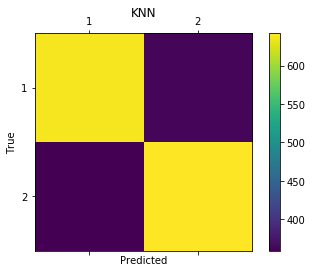

In [33]:
#Knn
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support as score
yhat_Knn = neigh.predict(X_eval)
accuracy = metrics.accuracy_score(y_eval, yhat_Knn)
   
print('Knn Evaluation:')
print('Accuracy: %.2f%%' % (accuracy * 100.0))
j_Knn= jaccard_similarity_score(y_eval, yhat_Knn )
f1_Knn= f1_score(y_eval, yhat_Knn )

print('Jaccard: %.2f%%' % (j_Knn * 100.0))
print('f1_score: %.2f%%' % (f1_Knn * 100.0))
precision_Knn= average_precision_score(y_eval, yhat_Knn )
recall_Knn= recall_score(y_eval, yhat_Knn )
#precision_Knn, recall_Knn, fscore_Knn, support_Knn = score(y_eval, yhat_Knn)
print('precision: %.2f%%' % (precision_Knn * 100.0))
print('recall: %.2f%%' % (recall_Knn * 100.0))
#print('fscore: %.2f%%' % (fscore_Knn * 100.0))
#print('support: %.2f%%' % (support_Knn * 100.0))
print(metrics.classification_report(y_eval, yhat_Knn))
#print(itemfreq(y_pred))
# Build confusion matrix
labels=[1,2]
cm = confusion_matrix(y_true=y_eval, y_pred=yhat_Knn )
print("Confusion matrix:\n", cm)
# Plot matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('KNN')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Decision Tree:
Accuracy: 65.23%
Jaccard: 65.23%
f1_score: 65.11%
              precision    recall  f1-score   support

           1       0.67      0.59      0.63      1001
           2       0.64      0.71      0.67      1001

   micro avg       0.65      0.65      0.65      2002
   macro avg       0.65      0.65      0.65      2002
weighted avg       0.65      0.65      0.65      2002

Confusion matrix:
 [[593 408]
 [288 713]]


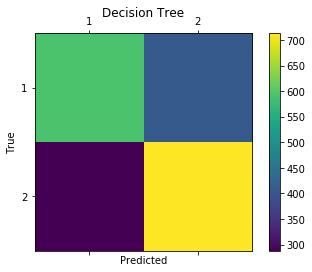

In [34]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#Predict
SeverityPredTree = SeverityTree.predict(X_eval)
# Get accuracy score
accuracy = metrics.accuracy_score(y_eval, SeverityPredTree)

print('Decision Tree:')
print('Accuracy: %.2f%%' % (accuracy * 100.0))
j_dt= jaccard_similarity_score(y_eval, SeverityPredTree)
f1_dt= f1_score(y_eval, SeverityPredTree, average='weighted')
print('Jaccard: %.2f%%' % (j_dt * 100.0))
print('f1_score: %.2f%%' % (f1_dt * 100.0))
print(metrics.classification_report(y_eval, SeverityPredTree))

#print(itemfreq(y_pred))
# Build confusion matrix
labels=[1,2]
cm = confusion_matrix(y_true=y_eval, y_pred=SeverityPredTree)
print("Confusion matrix:\n", cm)
# Plot matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Decision Tree')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Support Vector Machine's Accuracy:  0.6568431568431569
SVM:
Jaccard: 65.68%
f1_score: 64.01%
              precision    recall  f1-score   support

           1       0.67      0.61      0.64      1001
           2       0.64      0.70      0.67      1001

   micro avg       0.66      0.66      0.66      2002
   macro avg       0.66      0.66      0.66      2002
weighted avg       0.66      0.66      0.66      2002

Confusion matrix:
 [[611 390]
 [297 704]]


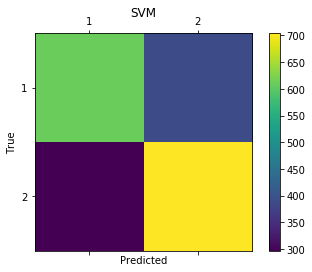

In [35]:
from sklearn import svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

yhat_svm = clf.predict(X_eval)
print("Support Vector Machine's Accuracy: ", metrics.accuracy_score(y_eval, yhat_svm))
j_svm= jaccard_similarity_score(y_eval, yhat_svm)
f1_svm= f1_score(y_eval, yhat_svm)
print('SVM:')
print('Jaccard: %.2f%%' % (j_svm * 100.0))
print('f1_score: %.2f%%' % (f1_svm * 100.0))
print(metrics.classification_report(y_eval, yhat_svm))

#print(itemfreq(y_pred))
# Build confusion matrix
labels=[1,2]
cm = confusion_matrix(y_true=y_eval, y_pred=yhat_svm)
print("Confusion matrix:\n", cm)
# Plot matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('SVM')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Logistic Regression:
Logistic Regression's Accuracy:  0.6358641358641358
Jaccard: 63.59%
f1_score: 62.64%
LogLoss: 61.17%
              precision    recall  f1-score   support

           1       0.70      0.48      0.57      1001
           2       0.60      0.80      0.69      1001

   micro avg       0.64      0.64      0.64      2002
   macro avg       0.65      0.64      0.63      2002
weighted avg       0.65      0.64      0.63      2002

Confusion matrix:
 [[477 524]
 [205 796]]


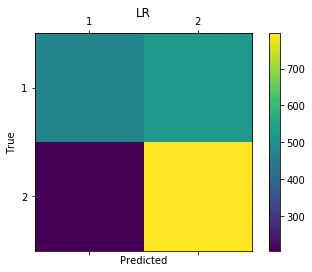

In [36]:
import pylab as plt
yhat_LR = LR.predict(X_eval)
yhat_prob_LR = LR.predict_proba(X_eval)
yhat_prob_LR
print('Logistic Regression:')
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_eval, yhat_LR))
j_LR= jaccard_similarity_score(y_eval, yhat_LR)
f1_LR= f1_score(y_eval, yhat_LR, average='weighted')
logloss = log_loss(y_eval, yhat_prob_LR)
print('Jaccard: %.2f%%' % (j_LR * 100.0))
print('f1_score: %.2f%%' % (f1_LR * 100.0))
print('LogLoss: %.2f%%' % (logloss * 100.0))
print(metrics.classification_report(y_eval, yhat_LR))
# Build confusion matrix
labels = [1,2]
cm = confusion_matrix(y_true=y_eval, y_pred=yhat_LR, labels=labels)
print("Confusion matrix:\n", cm)
# Plot matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('LR')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [37]:
jac =np.zeros(4)
jac[0] = j_Knn
jac[1] = j_dt
jac[2] = j_svm
jac[3] = j_LR

f1 =np.zeros(4)
f1[0] = f1_Knn
f1[1] = f1_dt
f1[2] = f1_svm
f1[3] = f1_LR


d={'Algorithm':['KNN (5000)','Decision Tree (Full)','SVM (5000)','LogisticRegression (Full)'],'Jaccard':jac,'F1-score':f1,'LogLoss':['NA','NA','NA',logloss]}
report= pd.DataFrame(d)
report.head()

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN (5000),0.639361,0.638639,NA
1,Decision Tree (Full),0.652348,0.651094,NA
2,SVM (5000),0.656843,0.640126,NA
3,LogisticRegression (Full),0.635864,0.626378,0.611718


In [38]:
print("Features:" ) 
pd.DataFrame(features_n).head(20)

Features:


,0
0,JUNCTIONTYPE
1,COLLISIONTYPE
2,WEATHER
3,ROADCOND
4,LIGHTCOND
5,bin_hours


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest:
Accuracy: 69.73%
Jaccard: 69.73%
f1_score: 69.35%
Confusion matrix:
 [[5880 4120]
 [2369 9067]]


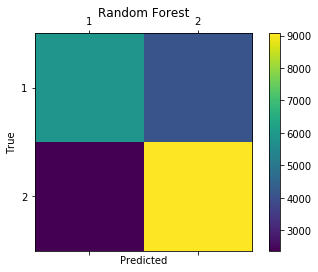

In [41]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#Decision Tree - no need for normalized data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
#Init Decision Tree
#SeverityTree = DecisionTreeClassifier(class_weight="balanced", criterion="entropy")
RFSeverityTree = RandomForestClassifier()
#Fit Training Data
RFSeverityTree.fit(X_train,y_train)
#Predict
RFSeverityPredTree = RFSeverityTree.predict(X_test)
# Get accuracy score
accuracy = metrics.accuracy_score(y_test, RFSeverityPredTree)

print('Random Forest:')
print('Accuracy: %.2f%%' % (accuracy * 100.0))
j_dt= jaccard_similarity_score(y_test, RFSeverityPredTree)
f1_dt= f1_score(y_test, RFSeverityPredTree, average='weighted')
print('Jaccard: %.2f%%' % (j_dt * 100.0))
print('f1_score: %.2f%%' % (f1_dt * 100.0))
#print(itemfreq(y_pred))
# Build confusion matrix
labels=[1,2]
cm = confusion_matrix(y_true=y_test, y_pred=RFSeverityPredTree)
print("Confusion matrix:\n", cm)
# Plot matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Random Forest')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Random Forest Decision Tree:
Accuracy: 64.54%
Jaccard: 64.54%
f1_score: 64.23%
              precision    recall  f1-score   support

           1       0.68      0.55      0.61      1001
           2       0.62      0.74      0.68      1001

   micro avg       0.65      0.65      0.65      2002
   macro avg       0.65      0.65      0.64      2002
weighted avg       0.65      0.65      0.64      2002

Confusion matrix:
 [[553 448]
 [262 739]]


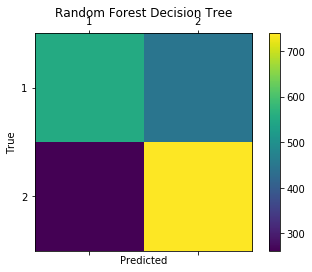

In [43]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#Predict
RFSeverityPredTree = RFSeverityTree.predict(X_eval)
# Get accuracy score
accuracy = metrics.accuracy_score(y_eval, RFSeverityPredTree)

print('Random Forest Decision Tree:')
print('Accuracy: %.2f%%' % (accuracy * 100.0))
j_dt= jaccard_similarity_score(y_eval, RFSeverityPredTree)
f1_dt= f1_score(y_eval, RFSeverityPredTree, average='weighted')
print('Jaccard: %.2f%%' % (j_dt * 100.0))
print('f1_score: %.2f%%' % (f1_dt * 100.0))
print(metrics.classification_report(y_eval, RFSeverityPredTree))

#print(itemfreq(y_pred))
# Build confusion matrix
labels=[1,2]
cm = confusion_matrix(y_true=y_eval, y_pred=RFSeverityPredTree)
print("Confusion matrix:\n", cm)
# Plot matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Random Forest Decision Tree')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()